<h1> Worldwide Suicide Data Visualization from 1985 to 2016 </h1>

The suicide data of 101 countries from 1985 to 2016 are recorded in the dataset. All the data are recorded in 12 different columns.

* **country:** name of suicide country
* **year:** year of suicide
* **sex:** gender
* **age:** age range of the person who committed suicide
* **suicides_no:** the raw number of reported suicides
* **population:** population of that country 
* **suicides_100k:** (total suicides / total population) * 100k
* **HDI for year:** Human Development Index in a given year 
* **gdp_for_year:** monetary measure of the market value of all the final goods and services produced in a given year
* **gdp_per_capita:** gdp_for_year/total_population of that year
* **generation:** name of the generation




# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [2]:
data = pd.read_csv("../input/suicide-rates-overview-1985-to-2016/master.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
data.shape

(27820, 12)

In [4]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Total 19456 values of "HDI for year" data are missing.

# Worldwide Observation

## Top 10 Countries: Highest Rate of Suiciding

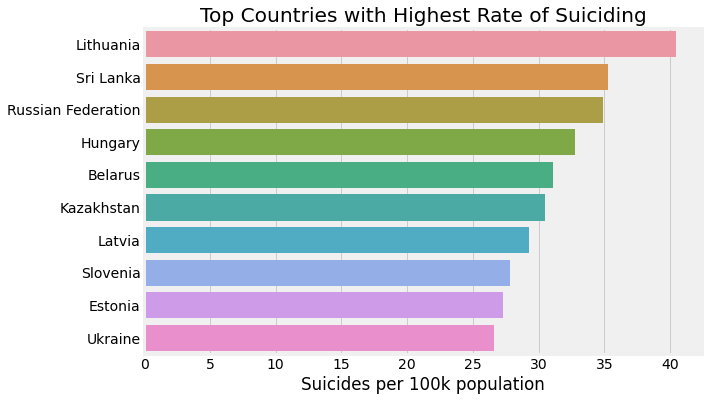

In [5]:
df = data.groupby("country").mean().reset_index().sort_values("suicides/100k pop", ascending=False)
plt.figure(figsize=(10,6))
plt.style.use("fivethirtyeight")
sns.barplot(x="suicides/100k pop", y="country",  data=df.iloc[:10])
plt.title("Top Countries with Highest Rate of Suiciding")
plt.ylabel("")
plt.xlabel("Suicides per 100k population")
plt.show()

## Top 10 Countries: Highest Number of Suiciding

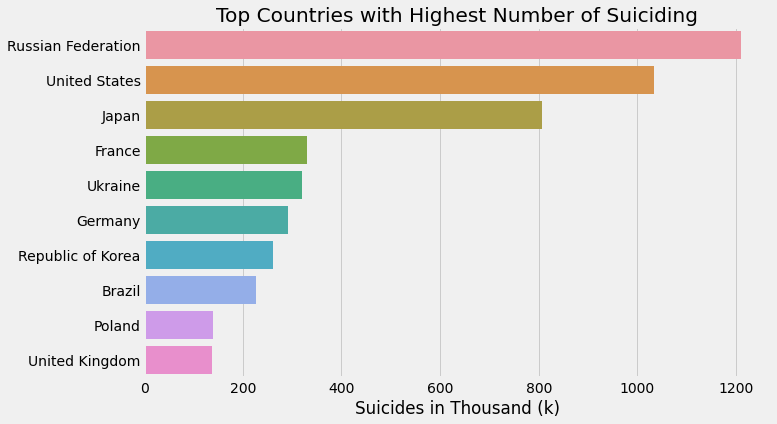

In [6]:
df = data.groupby("country").sum().reset_index().sort_values("suicides_no", ascending=False)
df.suicides_no = (df.suicides_no/1000)

plt.figure(figsize=(10,6))
plt.style.use("fivethirtyeight")
sns.barplot(x="suicides_no", y="country",  data=df.iloc[:10])
plt.title("Top Countries with Highest Number of Suiciding")
plt.ylabel("")
plt.xlabel("Suicides in Thousand (k)")
plt.show()

<h3 style="color:gray">Though LITHUANIA has the highest rate of suiciding but most people suicide from RUSSIAN Federation.</h3>

## Top 10 Lowest Rate of Suiciding Countries

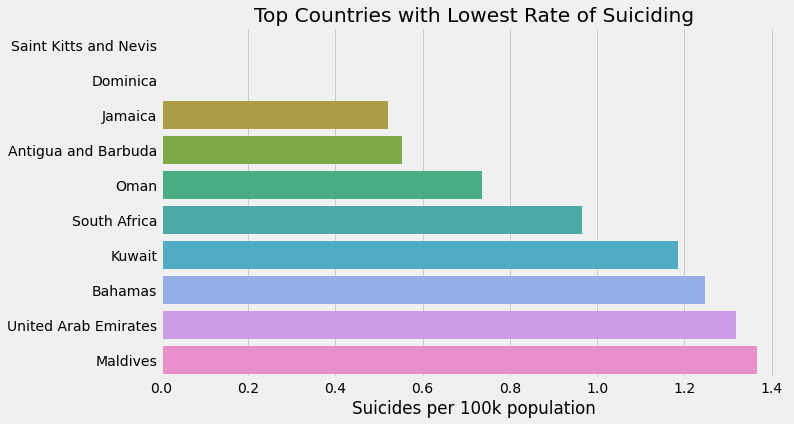

In [7]:
df = data.groupby("country").mean().reset_index().sort_values("suicides/100k pop", ascending=True)
plt.figure(figsize=(10,6))
plt.style.use("fivethirtyeight")
sns.barplot(x="suicides/100k pop", y="country",  data=df.iloc[:10])
plt.title("Top Countries with Lowest Rate of Suiciding")
plt.ylabel("")
plt.xlabel("Suicides per 100k population")
plt.show()

## Top 10 Countries: Lowest Number of Suiciding

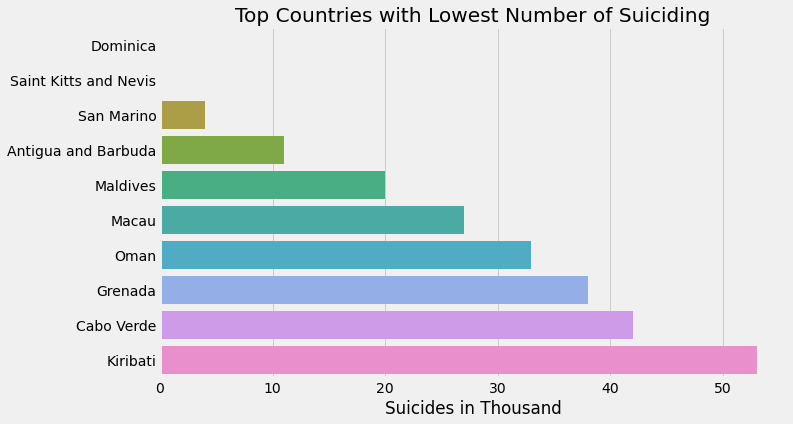

In [8]:
df = data.groupby("country").sum().reset_index().sort_values("suicides_no", ascending=True)
plt.figure(figsize=(10,6))
plt.style.use("fivethirtyeight")
sns.barplot(x="suicides_no", y="country",  data=df.iloc[:10])
plt.title("Top Countries with Lowest Number of Suiciding")
plt.ylabel("")
plt.xlabel("Suicides in Thousand")
plt.show()

<h3 style="color:gray">No Suicide data is recorded in "Dominica" and "Saint Kitts and Nevis"</h3>

## Suicides Based on Generation

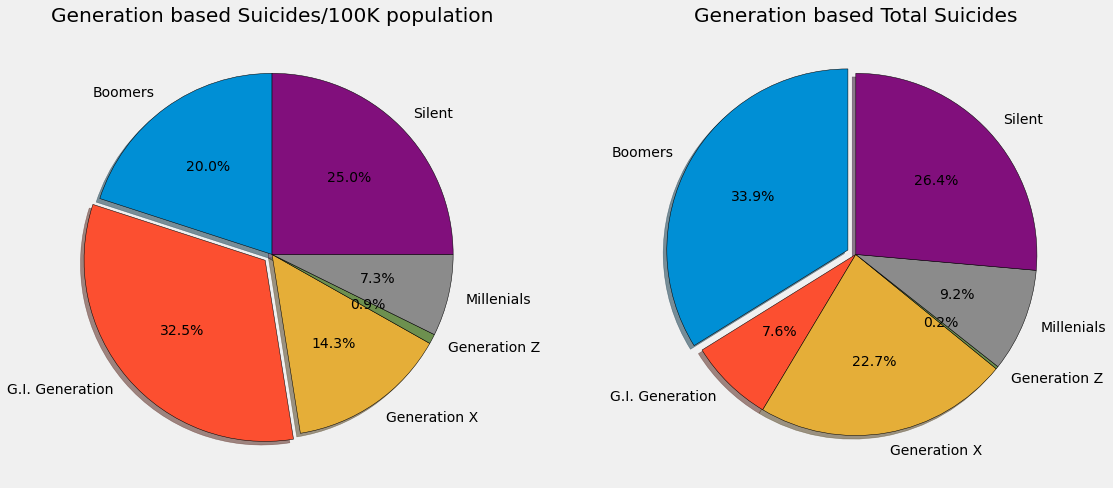

In [9]:
df = data.groupby("generation").mean().reset_index()
#list(df["suicides/100k pop"])
plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1)
slices = list(df["suicides/100k pop"])
labels = list(df.generation)
explode = [0,0.05,0,0,0,0]
plt.pie(slices, labels=labels, explode=explode,shadow=True, startangle=90,autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'})
plt.title("Generation based Suicides/100K population")
plt.tight_layout()

df = data.groupby("generation").sum().reset_index()
plt.subplot(1, 2, 2)
slices = list(df["suicides_no"])
labels = list(df.generation)
explode = [0.05,0,0,0,0,0]
plt.pie(slices, labels=labels, explode=explode, shadow=True, startangle=90,autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'})
plt.title("Generation based Total Suicides")
plt.tight_layout()


plt.show()

<h3 style="color:gray">Suicide rate is high in G.I. Generation but most people suicide from </h3>

## Suicide Rate Based on Gender

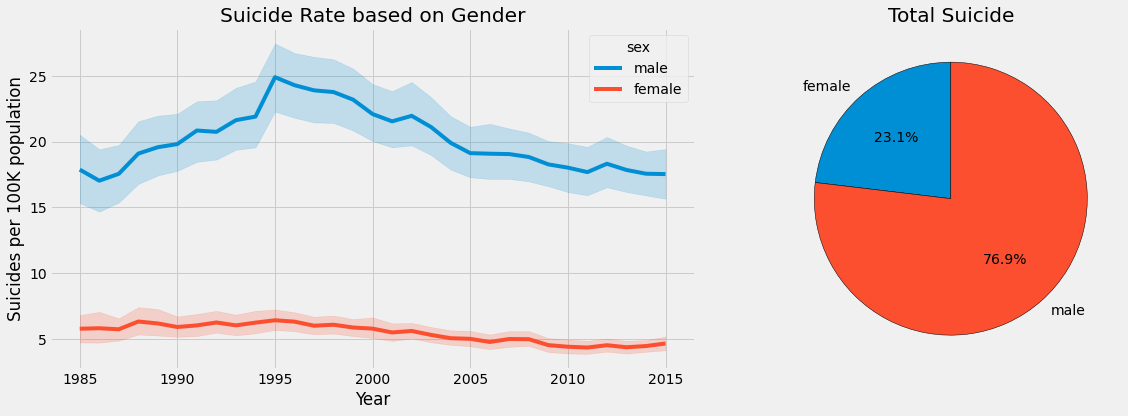

In [10]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.lineplot(x="year", y="suicides/100k pop", hue="sex", data=data[(data.year!=2016)]).xaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
plt.title("Suicide Rate based on Gender")
plt.ylabel("Suicides per 100K population")
plt.xlabel("Year")


plt.subplot(1, 2, 2)
df = data.groupby("sex").sum().reset_index()
slices = list(df["suicides_no"])
labels = list(df.sex)
plt.pie(slices, labels=labels, startangle=90,autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'})
plt.title("Total Suicide")
plt.tight_layout()

plt.show()

## Total Suicides Based on Year

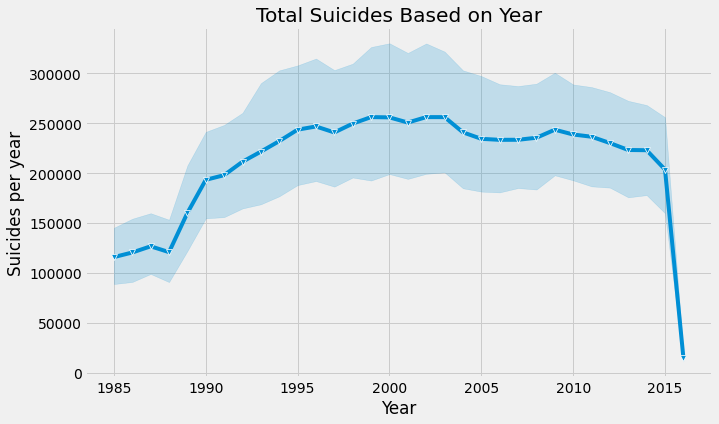

In [11]:
plt.figure(figsize=(10,6))
sns.lineplot(y="suicides_no", x="year",marker="v", estimator=sum, data=data).xaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
plt.title("Total Suicides Based on Year")
plt.ylabel("Suicides per year")
plt.xlabel("Year")
plt.show()

## Average Suicide Rate based on Year

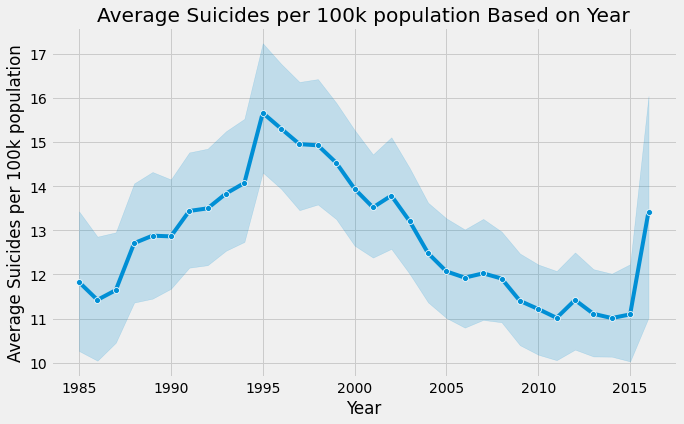

In [12]:
plt.figure(figsize=(10,6))
plt.style.use("fivethirtyeight")
sns.lineplot(x="year", y="suicides/100k pop", marker="o", data=data).xaxis.set_major_formatter(FormatStrFormatter('%1.0f'))
plt.title("Average Suicides per 100k population Based on Year")
plt.ylabel("Average Suicides per 100k population")
plt.xlabel("Year")
plt.show()

**NOTE:** Here we can see that total suicide is decreasing after 2015 but the suicide rate is increasing. This is because all the suicide data of 2016 are not recorded.

## Corelation of the Data

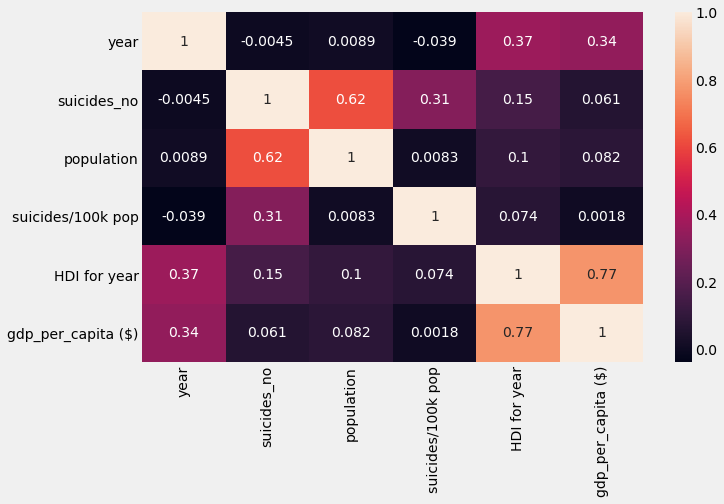

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)
plt.show()

<h3 style="color:gray">The correlation between "gdp_per_capite" and "HDI for the year"  is pretty good. So the Human Development Index of a country improves as the GDP increases.</h3>


# Country Based Observation

## Lithuania 

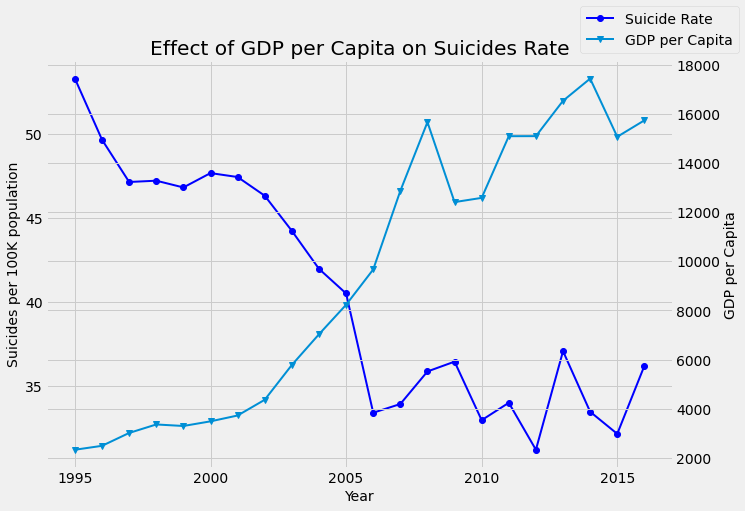

In [14]:
country = data.groupby("country").get_group("Lithuania").reset_index()
df = country.groupby("year").mean().reset_index()


fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(df["year"], df["suicides/100k pop"],marker="o", label="Suicide Rate", linewidth=2, color="b")
ax1.set_ylabel("Suicides per 100K population",fontsize=14)
ax1.set_xlabel("Year",fontsize=14)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%1.0f'))

ax2 = ax1.twinx()
ax2.plot(df["year"], df["gdp_per_capita ($)"], marker="v", label="GDP per Capita", linewidth=2,)
ax2.set_ylabel("GDP per Capita",fontsize=14)

fig.legend(["Suicide Rate", "GDP per Capita"])
plt.title("Effect of GDP per Capita on Suicides Rate",loc="center")
fig.show()

# United States

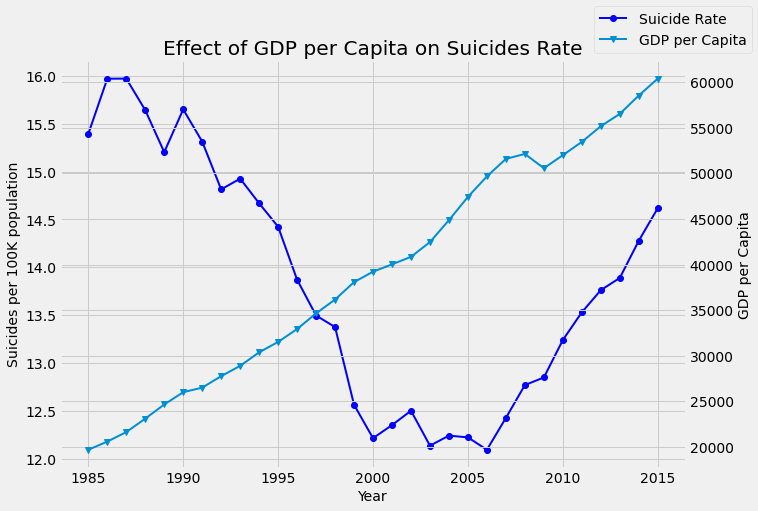

In [15]:
country = data.groupby("country").get_group("United States").reset_index()
df = country.groupby("year").mean().reset_index()


fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(df["year"], df["suicides/100k pop"],marker="o", label="Suicide Rate", linewidth=2, color="b")
ax1.set_ylabel("Suicides per 100K population",fontsize=14)
ax1.set_xlabel("Year",fontsize=14)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%1.0f'))

ax2 = ax1.twinx()
ax2.plot(df["year"], df["gdp_per_capita ($)"], marker="v", label="GDP per Capita", linewidth=2,)
ax2.set_ylabel("GDP per Capita",fontsize=14)

fig.legend(["Suicide Rate", "GDP per Capita"])
plt.title("Effect of GDP per Capita on Suicides Rate",loc="center")
fig.show()

# Russian Federation

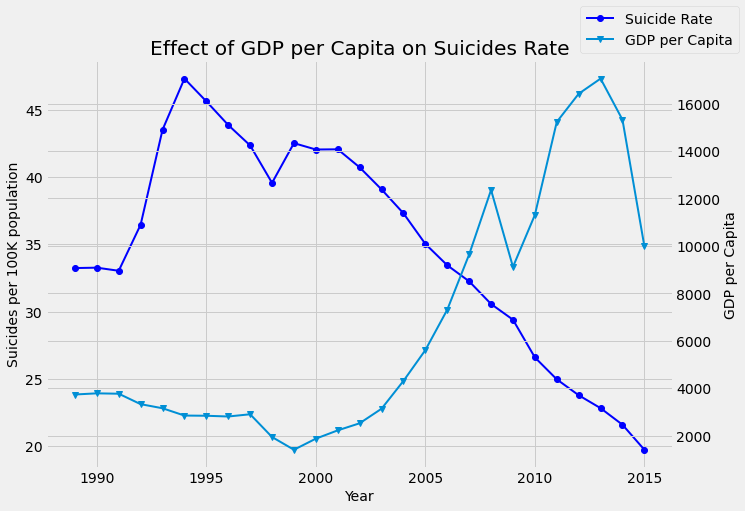

In [16]:
country = data.groupby("country").get_group("Russian Federation").reset_index()
df = country.groupby("year").mean().reset_index()


fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(df["year"], df["suicides/100k pop"],marker="o", label="Suicide Rate", linewidth=2, color="b")
ax1.set_ylabel("Suicides per 100K population",fontsize=14)
ax1.set_xlabel("Year",fontsize=14)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%1.0f'))

ax2 = ax1.twinx()
ax2.plot(df["year"], df["gdp_per_capita ($)"], marker="v", label="GDP per Capita", linewidth=2,)
ax2.set_ylabel("GDP per Capita",fontsize=14)

fig.legend(["Suicide Rate", "GDP per Capita"])
plt.title("Effect of GDP per Capita on Suicides Rate",loc="center")
fig.show()

# Sri Lanka

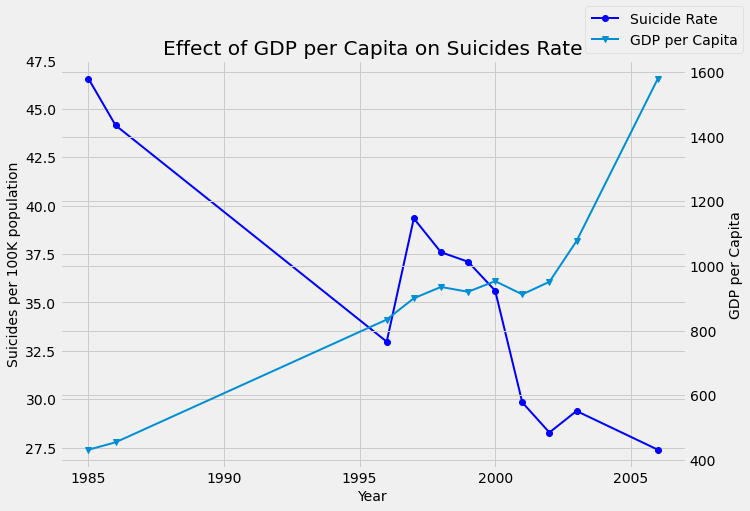

In [17]:
country = data.groupby("country").get_group("Sri Lanka").reset_index()
df = country.groupby("year").mean().reset_index()


fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(df["year"], df["suicides/100k pop"],marker="o", label="Suicide Rate", linewidth=2, color="b")
ax1.set_ylabel("Suicides per 100K population",fontsize=14)
ax1.set_xlabel("Year",fontsize=14)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%1.0f'))

ax2 = ax1.twinx()
ax2.plot(df["year"], df["gdp_per_capita ($)"], marker="v", label="GDP per Capita", linewidth=2,)
ax2.set_ylabel("GDP per Capita",fontsize=14)

fig.legend(["Suicide Rate", "GDP per Capita"])
plt.title("Effect of GDP per Capita on Suicides Rate",loc="center")
fig.show()

# Japan

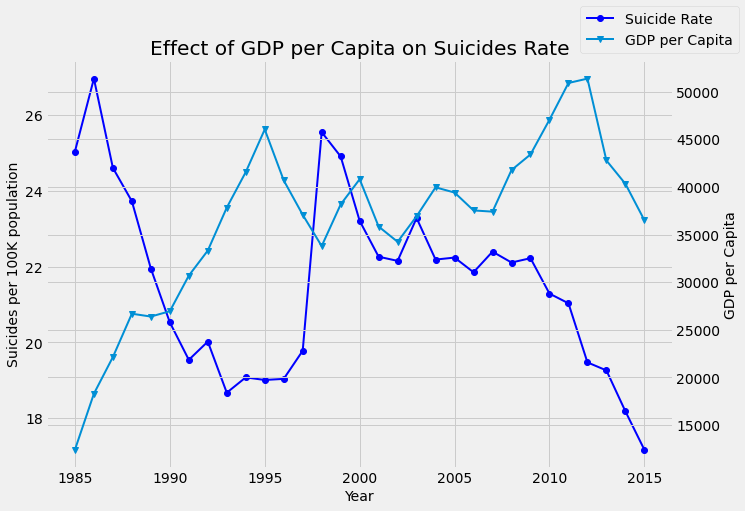

In [18]:
country = data.groupby("country").get_group("Japan").reset_index()
df = country.groupby("year").mean().reset_index()


fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(df["year"], df["suicides/100k pop"],marker="o", label="Suicide Rate", linewidth=2, color="b")
ax1.set_ylabel("Suicides per 100K population",fontsize=14)
ax1.set_xlabel("Year",fontsize=14)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%1.0f'))

ax2 = ax1.twinx()
ax2.plot(df["year"], df["gdp_per_capita ($)"], marker="v", label="GDP per Capita", linewidth=2,)
ax2.set_ylabel("GDP per Capita",fontsize=14)

fig.legend(["Suicide Rate", "GDP per Capita"])
plt.title("Effect of GDP per Capita on Suicides Rate",loc="center")
fig.show()

<h3 style="color:gray">From the analysis of the top 5 high suicidal countries data, it is found that the suicide rate decreases with the increase of GDP per capita.</h3>